In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../modelling_joseph/final.csv")
df = df.drop('Unnamed: 0' , axis = 1)

[Text(0,0.5,'Units'), Text(0.5,0,'Holiday')]

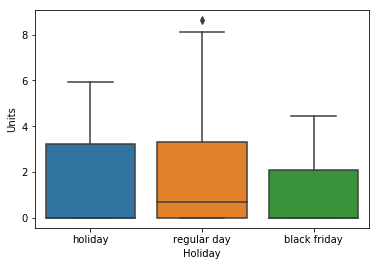

In [58]:
k = sns.boxplot(x="holiday" , y="scaled" , data =df[['holiday', 'scaled']])
k.set(xlabel = "Holiday" , ylabel = "Units")

<Figure size 1440x720 with 0 Axes>

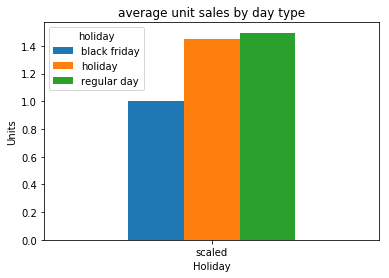

In [59]:
plt.figure(figsize = (20,10))
x = pd.DataFrame(df.groupby(['holiday'])['scaled'].mean()).transpose()
y = x.plot(kind='bar', title = 'average unit sales by day type')
y.set(xlabel = "Holiday" , ylabel = "Units")
plt.xticks(rotation = 360)
plt.show()

In [66]:
# holiday 추가해주기 
import re 
with open('/Users/taeahn/Desktop/Team Project/Data/base_dataset/holiday_names.txt') as file:  
    data = file.readlines()
    holidays = []
    months = ["", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for holiday in data : 
        holidays.append(holiday.split(" ")[:3])
    for i in range(len(holidays)): 
        month_idx = months.index(holidays[i][1])
        if month_idx < 10:
            holidays[i][1] = "0" + str(month_idx)
        else:
            holidays[i][1] = str(month_idx)
    for z in range(len(holidays)) : 
        if len(holidays[z][2]) == 1 : 
            holidays[z][2] = '0' + holidays[z][2]

# holiday 구분하기 
def isholiday(dt): 
    temp = str(dt)
    if temp.split("-") in holidays :
        return "Holiday"
    else :
        return "Regular Day"

df['holiday2'] = df['date'].apply(isholiday)

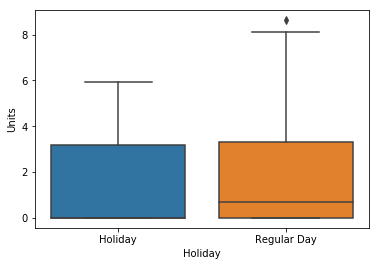

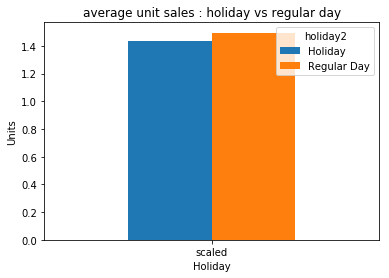

In [67]:
k = sns.boxplot(x="holiday2" , y="scaled" , data =df[['holiday2', 'scaled']])
k.set(xlabel = "Holiday" , ylabel = "Units")

x = pd.DataFrame(df.groupby(['holiday2'])['scaled'].mean()).transpose()
y = x.plot(kind='bar', title = 'average unit sales : holiday vs regular day')
y.set(xlabel = 'Holiday' , ylabel = 'Units')
plt.xticks(rotation = 360)
plt.show()

In [14]:
# independent two sample test
# holiday 와 regular_day 의 sales 의 분포가 다르기 때문에 넣어야 한다 
from scipy import stats
holiday = np.array(df[df['holiday2'] == 'holiday']['scaled'])
regular_day = np.array(df[df['holiday2'] == 'regular day']['scaled'])
statistic , p_value = stats.ttest_ind(holiday,regular_day, equal_var = False)
p_value

0.00016014652195563267

In [61]:
import datetime
def isweekend(dt) : 
    day, month, year = (int(x) for x in dt.split('-'))  
    ans = datetime.date(day, month, year)
    p = datetime.date.weekday(ans)
    if p == 0 :
        return "Monday"
    elif p == 1: 
        return "Tuesday"
    elif p == 2: 
        return "Wednesday"
    elif p == 3: 
        return "Thursday"
    elif p == 4: 
        return "Friday"
    elif p == 5: 
        return "Saturday"
    else : 
        return "Sunday"


df['isweekend2'] = df['date'].apply(isweekend)

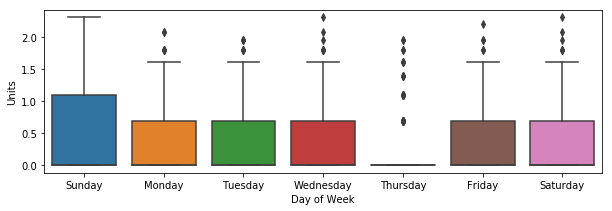

In [62]:
# item 별로 팔리는 요일이 다르다 
# 많이 아이템 별로 접근해보자 : item 1 
# item 1은 수요일날 거의 안 팔리는 것을 볼 수 있다 
df_1 = df[df["item_nbr"] == 1]
plt.figure(figsize=(10,3))
box = sns.boxplot(x="isweekend2", y="scaled", data=df_1[["isweekend2", "scaled"]])
box.set(xlabel="Day of Week", ylabel="Units")
plt.show()

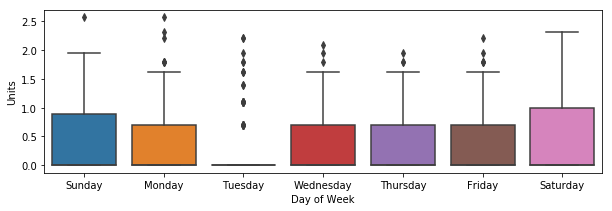

In [63]:
# item 별로 팔리는 요일이 다르다 
# 많이 아이템 별로 접근해보자 : item 3
# item3는 월요일날 거의 안 팔리는 품목인 것을 확인 할 수 있다
df_1 = df[df["item_nbr"] == 3]
plt.figure(figsize=(10,3))
box = sns.boxplot(x="isweekend2", y="scaled", data=df_1[["isweekend2", "scaled"]])
box.set(xlabel="Day of Week", ylabel="Units")
plt.show()

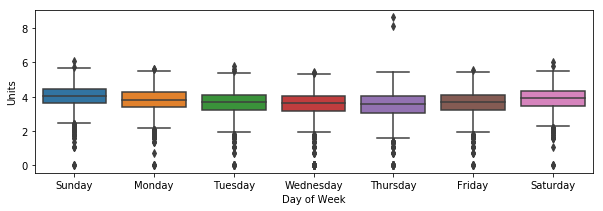

In [64]:
# item 별로 팔리는 요일이 다르다 
# 많이 아이템 별로 접근해보자 : item 5
# item5, 45는 꾸준히 잘 팔리는 품목으로써 요일에 비탄력적인 모습을 보인다
df_1 = df[df["item_nbr"] == 5]
plt.figure(figsize=(10,3))
box = sns.boxplot(x="isweekend2", y="scaled", data=df_1[["isweekend2", "scaled"]])
box.set(xlabel="Day of Week", ylabel="Units")
plt.show()

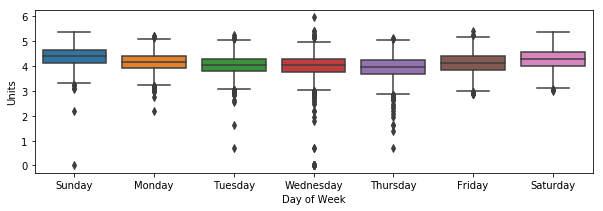

In [65]:
# item 별로 팔리는 요일이 다르다 
# 많이 아이템 별로 접근해보자 : item 45
df_1 = df[df["item_nbr"] == 45]
plt.figure(figsize=(10,3))
box = sns.boxplot(x="isweekend2", y="scaled", data=df_1[["isweekend2", "scaled"]])
box.set(xlabel="Day of Week", ylabel="Units")
plt.show()